In [74]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.model_selection import train_test_split
import pickle

# Data preprocessing

In [42]:
df = pd.read_csv('data.csv')
df.head()

,Test ID,easting__N,northing__,GWD (m),Elevation,L (km),Slope (%),PGA (g),qc1Ncs_med,qc1Ncs_std,Ic_med,Ic_std,Target,Displ (m)
0,15635.0,1.577647e+06,5.182056e+06,1.300896,1.123009,0.211770,0.905948,0.532398,123.393393,23.853785,1.625464,0.112291,0,0.195432
1,15629.0,1.577685e+06,5.181809e+06,1.788212,2.044325,0.115795,0.451034,0.542307,135.790982,34.965532,1.626258,0.358778,0,0.239763
2,183.0,1.577701e+06,5.181709e+06,1.637517,2.003797,0.137265,0.941866,0.545784,129.140240,38.641063,4.569982,0.434698,1,0.377358
3,158.0,1.577726e+06,5.181965e+06,1.165643,0.992154,0.073885,2.699290,0.535794,94.733152,32.039927,1.766342,0.462708,0,0.241755
4,180.0,1.577731e+06,5.182267e+06,2.121364,1.933611,0.119745,1.187781,0.528980,94.189786,9.524548,1.864985,0.162700,0,0.156150


In [44]:
# making dataset for model A, B and C
df_b = df.drop(['easting__N', 'northing__', 'Displ (m)'],axis=1)
df_a = df_b.drop(['qc1Ncs_med','qc1Ncs_std','Ic_med','Ic_std'],axis=1)
df_c = df_b.drop(['Slope (%)','qc1Ncs_med','qc1Ncs_std'],axis=1)

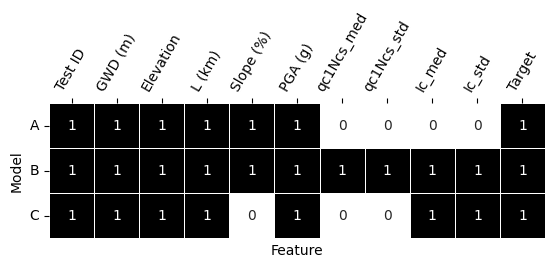

In [68]:
# show features in each model
temp = []
temp.append(np.isin(df_b.columns.values, df_a.columns.values))
temp.append(np.isin(df_b.columns.values, df_b.columns.values))
temp.append(np.isin(df_b.columns.values, df_c.columns.values))
ax = sns.heatmap(temp, annot=True, cmap="gray_r",
                 yticklabels=['A','B','C'], xticklabels=df_b.columns,
                 square=True, linewidths=.5, cbar=False)
ax.set(xlabel="Feature", ylabel="Model")
ax.xaxis.tick_top()
plt.yticks(rotation=0) 
plt.xticks(rotation=60) 
plt.show()

In [69]:
print('Lateral spreading datapoint (Yes/No)')
print(f'Yes:\t{df_a.Target.value_counts()[1]}')
print(f'No:\t{df_a.Target.value_counts()[0]}')
print(f'Total:\t{df_a.Target.value_counts().sum()}')
print(f'Percentage of Yes:\t{df_a.Target.value_counts()[1]/df_a.Target.value_counts().sum()*100:.2f}%')

Lateral spreading datapoint (Yes/No)
Yes:	2752
No:	3753
Total:	6505
Percentage of Yes:	42.31%


## Split training, test and validation

In [70]:
#define features matrix (X) and target (y)
def split_data(df):
    X = df.copy(deep=True)
    y = df['Target']
    X_train_target, X_val_test_target, y_train, y_val_test = train_test_split(X, y, test_size=0.2, random_state=0)
    X_test_target, X_val_target, y_test, y_val = train_test_split(X_val_test_target, y_val_test, test_size=0.25, random_state=0)
    X_all = X.drop(['Test ID', 'Target'], axis=1)
    X_test = X_test_target.drop(['Test ID', 'Target'], axis = 1)
    X_train = X_train_target.drop(['Test ID', 'Target'], axis = 1)
    X_val = X_val_target.drop(['Test ID', 'Target'], axis = 1)
    return {'X':X, 'X_all':X_all, 'y':y,
            'X_train_target':X_train_target, 'X_train':X_train, 'y_train':y_train,
            'X_test_target':X_test_target, 'X_test':X_test, 'y_test':y_test,
            'X_val_target':X_val_target, 'X_val':X_val, 'y_val':y_val
           }
def stratified_data(df):
    X = df.copy(deep=True)
    y = df['Target']
    X_train_target, X_val_test_target, y_train, y_val_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
    X_test_target, X_val_target, y_test, y_val = train_test_split(X_val_test_target, y_val_test, test_size=0.25, random_state=0, stratify=y_val_test)
    X_all = X.drop(['Test ID', 'Target'], axis=1)
    X_test = X_test_target.drop(['Test ID', 'Target'], axis = 1)
    X_train = X_train_target.drop(['Test ID', 'Target'], axis = 1)
    X_val = X_val_target.drop(['Test ID', 'Target'], axis = 1)
    return {'X':X, 'X_all':X_all, 'y':y,
            'X_train_target':X_train_target, 'X_train':X_train, 'y_train':y_train,
            'X_test_target':X_test_target, 'X_test':X_test, 'y_test':y_test,
            'X_val_target':X_val_target, 'X_val':X_val, 'y_val':y_val
           }

In [71]:
# split data for model A, B and C
data_a = split_data(df_a)
data_b = split_data(df_b)
data_c = split_data(df_c)
# show the number of positive and negative in train, val, and test dataset
print(f'Dataset\tYes\tNo\tPositive Rate')
print(f'Train\t{data_a["y_train"].value_counts()[1]}\t{data_a["y_train"].value_counts()[0]}\t{data_a["y_train"].value_counts()[1]/len(data_a["y_train"])*100:.2f}%')
print(f'Val\t{data_a["y_val"].value_counts()[1]}\t{data_a["y_val"].value_counts()[0]}\t{data_a["y_val"].value_counts()[1]/len(data_a["y_val"])*100:.2f}%')
print(f'Test\t{data_a["y_test"].value_counts()[1]}\t{data_a["y_test"].value_counts()[0]}\t{data_a["y_test"].value_counts()[1]/len(data_a["y_test"])*100:.2f}%')

Dataset	Yes	No	Positive Rate
Train	2182	3022	41.93%
Val	150	176	46.01%
Test	420	555	43.08%


In [72]:
# Write data to pickle
file_path = 'data/'
pickle.dump(data_a,open(file_path+'data_a.pkl','wb'))
pickle.dump(data_b,open(file_path+'data_b.pkl','wb'))
pickle.dump(data_c,open(file_path+'data_c.pkl','wb'))

## Data summary

In [73]:
# Load the data from the file
with open(f'{file_path}data_b.pkl', 'rb') as file:
    data = pickle.load(file)

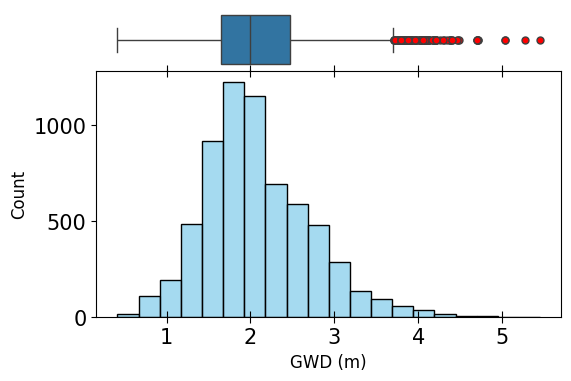

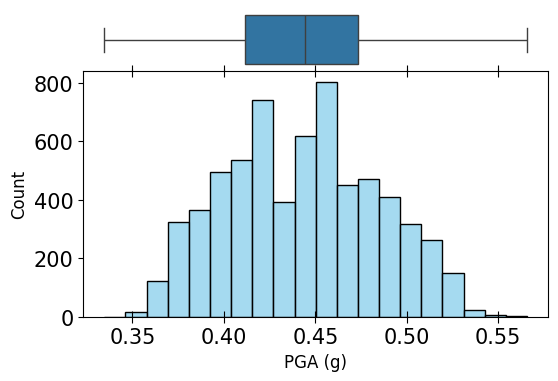

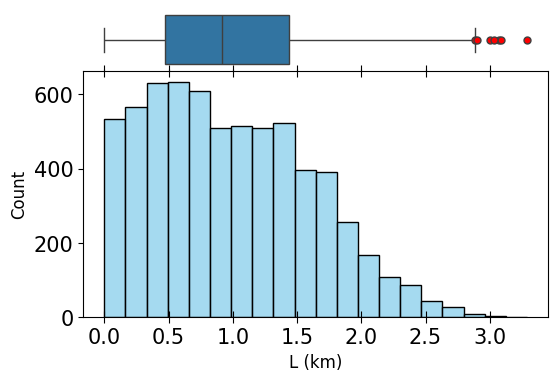

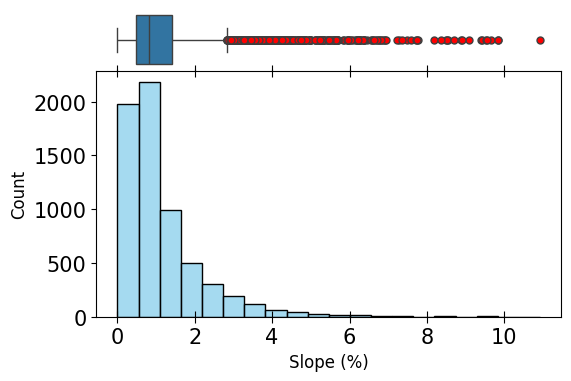

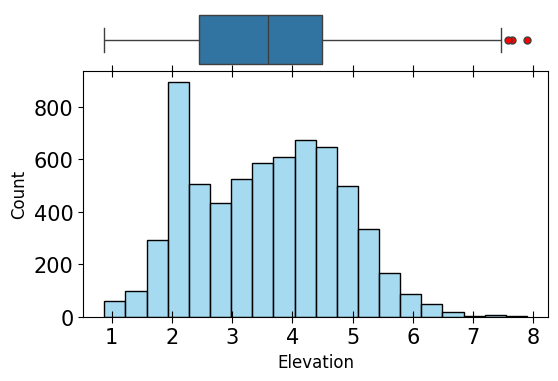

In [76]:
basic_features = ['GWD (m)', 'PGA (g)', 'L (km)', 'Slope (%)', 'Elevation']
for feature in basic_features:    
    # Create a grid of subplots using gridspec
    fig = plt.figure(figsize=(6, 4))
    gs = gridspec.GridSpec(2, 1, height_ratios=[1, 4])

    # Plot the histogram in the top subplot
    ax1 = plt.subplot(gs[0])
    sns.boxplot(data=data['X_all'][feature], ax=ax1, flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 5}, orient='h')
    ax1.set_xlabel(None)
    ax1.set_ylabel(None)
    ax1.set_yticks([])  # Remove y-ticks
    # Remove the boundary around the subplots
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.spines['bottom'].set_visible(False)
    ax1.spines['left'].set_visible(False)


    # Plot the box plot in the bottom subplot
    ax2 = plt.subplot(gs[1], sharex = ax1)
    sns.histplot(data=data['X_all'][feature], ax=ax2, color='skyblue', bins=20)
    ax2.set_xlabel(feature, fontsize=12)  # Increase the font size of the x-axis label
    ax2.set_ylabel('Count', fontsize=12)  # Set the y-axis label to 'Count'
    # Show xticks on both top and bottom
    ax1.tick_params(axis='x', bottom=True, direction='inout')
    ax2.tick_params(axis='x', bottom=True, top=True, direction='inout', length=8, labelsize=15)
    ax2.tick_params(axis='y', labelsize=15)


    # remove vertical gap between subplots
    plt.subplots_adjust(hspace=.0)

    # Show the plot
    plt.show()
    # plt.savefig(f'figs/{feature}.eps', format='eps', dpi=300, bbox_inches='tight')


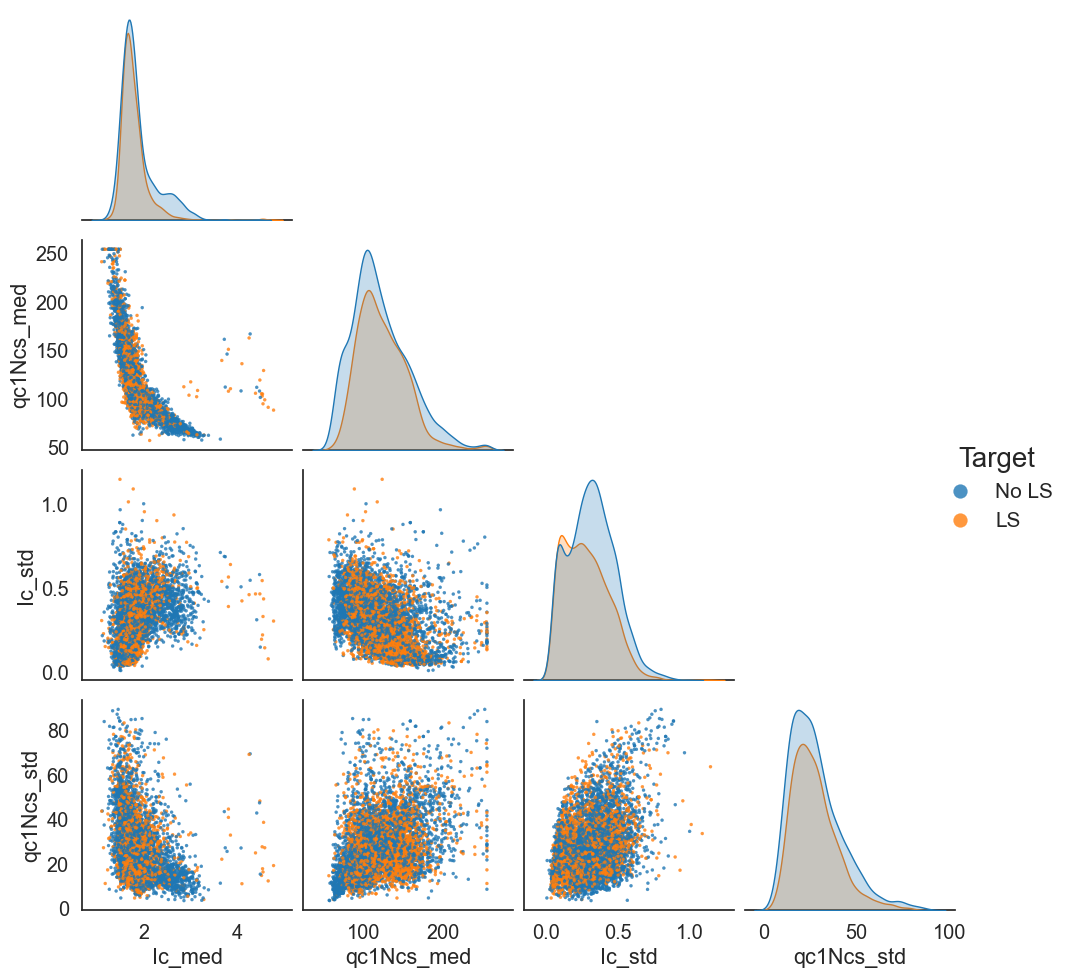

In [78]:
# Get the unselected features
cpt_features = [feature for feature in data['X_all'].columns if feature not in basic_features]
# Create a dataframe with the CPT features
cpt_df = data['X_all'][cpt_features].copy()
# Add the target variable to the dataframe
cpt_df['Target'] = data['y']
#sns.set(font_scale=1.5, style='white', palette='colorblind')
sns.set_theme(style='white', palette='tab10', font_scale=1.3)
# Create the pairplot
g = sns.pairplot(cpt_df, hue='Target',corner=True,
                 vars=['Ic_med','qc1Ncs_med','Ic_std','qc1Ncs_std'],
                plot_kws={'s': 5, 'edgecolor': None, 'alpha': 0.8})
                # Show the plot
g._legend.set_title("Target", prop={'size': 20})
g._legend.texts[0].set_text('No LS')
g._legend.texts[0].set_fontsize(15)
g._legend.texts[1].set_text('LS')
g._legend.texts[1].set_fontsize(15)
for lh in g._legend.legend_handles: 
    lh.set_markersize(10)
# Show the updated plot
# plt.savefig('figs/pairplot.jpg', dpi=300)
plt.show()